<figure>
    <center>
    <img src="../../figures/kinki2.png"  width="400" height="370" align="center"/>
    </center>
</figure>

# <span style="color:blue"><center>Hackathon: Shinkansen Travel Experience</center></span>

# <span style="color:red"><center>Process studied</center></span>

## <span style="color:green"><center>Notebook's Topic</center></span>

## <span style="color:blue">Authors</span>

1. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com
1. Juan Felipe Contreras Alcívar, j.contrerasa94@gmail.com

## <span style="color:blue">References</span>

1. [Ref to Link](link here)

## <span style="color:blue">Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

## <span style="color:blue"> Importing data</span>

In [2]:
train_df = pd.read_csv('../../input/train/merged/train_merged.csv', sep=';')
test_df = pd.read_csv('../../input/test/merged/test_merged.csv', sep=';')

train_df['train_test'] = 'train'
test_df['train_test'] = 'test'

df = pd.concat([train_df, test_df])
df.reset_index(inplace=True, drop=True)

In [3]:
df

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,train_test
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0.0,...,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,train
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0.0,...,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,train
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1.0,...,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,train
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0.0,...,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,train
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1.0,...,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129976,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,NaN,...,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable,test
129977,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,NaN,...,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good,test
129978,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,NaN,...,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement,test
129979,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,NaN,...,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good,test


## <span style="color:blue"> Missing values analysis </span>

<Axes: >

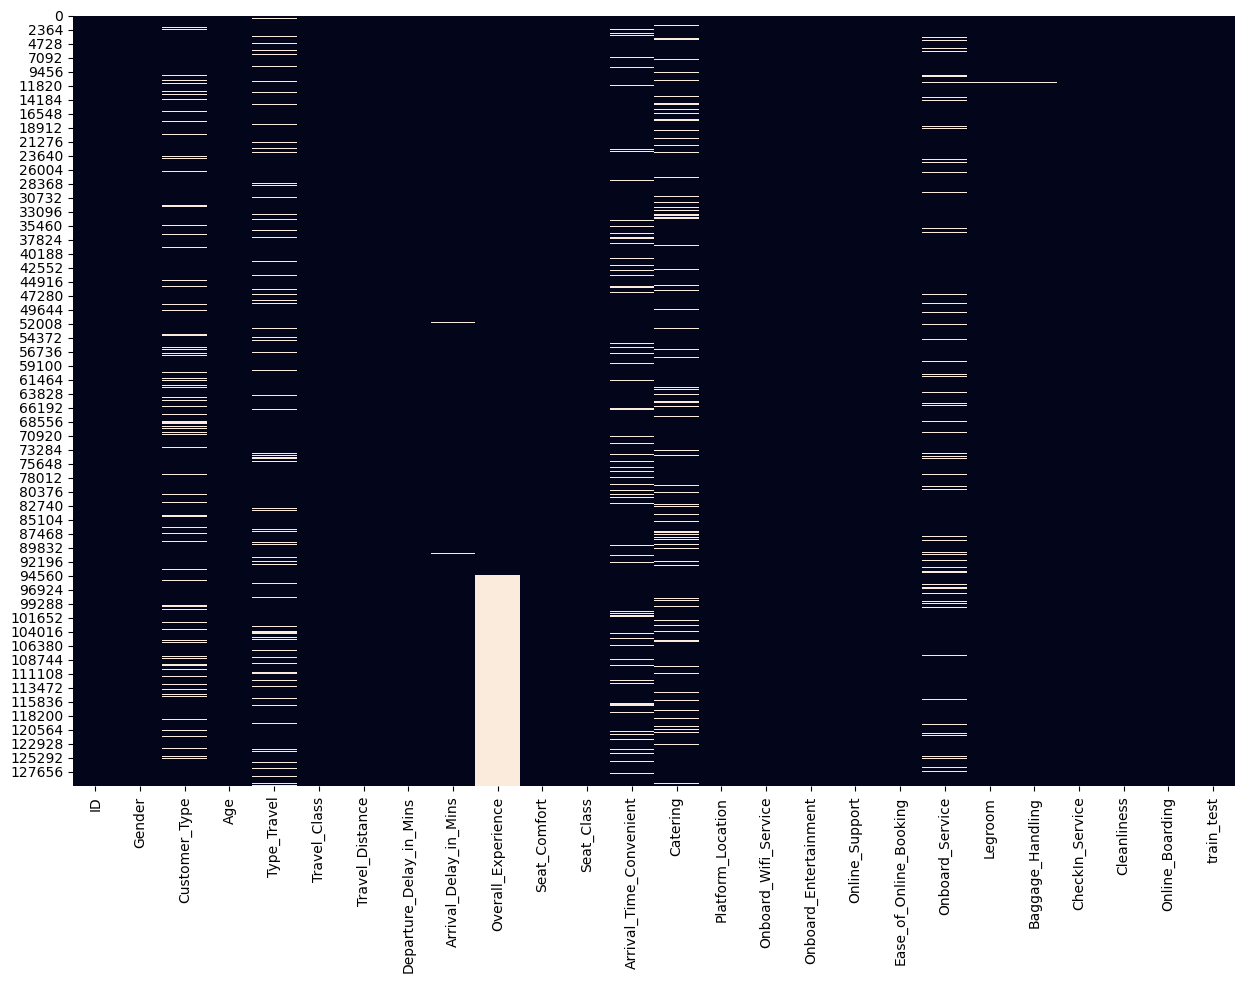

In [4]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False)

In [5]:
df['ID'] = df['ID'].astype('str')

## <span style="color:blue"> Numeric imputations </span>

In [6]:
# Mean imputation for numerical columns
mean_imputed_data = df.copy()
numerical_cols = list(mean_imputed_data.select_dtypes(include=[np.number]).columns)
numerical_cols.remove('Overall_Experience')

for col in numerical_cols:
    mean_imputed_data[col].fillna(mean_imputed_data[col].mean(), inplace=True)

In [7]:
def plot_distributions(original_data, imputed_data, columns, method_name):
    for col in columns:

        fig, ax = plt.subplots(1, 2, figsize=(20, 5))
        fig.suptitle(f'Comparing distribution original vs imputed for {col}', fontsize=15)

        ax[0].hist(original_data[col].dropna(), bins=20, color='blue')
        ax[0].set_title('Original distribution')
        
        ax[1].hist(imputed_data[col].dropna(), bins=20, color='red')
        ax[1].set_title('Imputed distribution')
        plt.show()

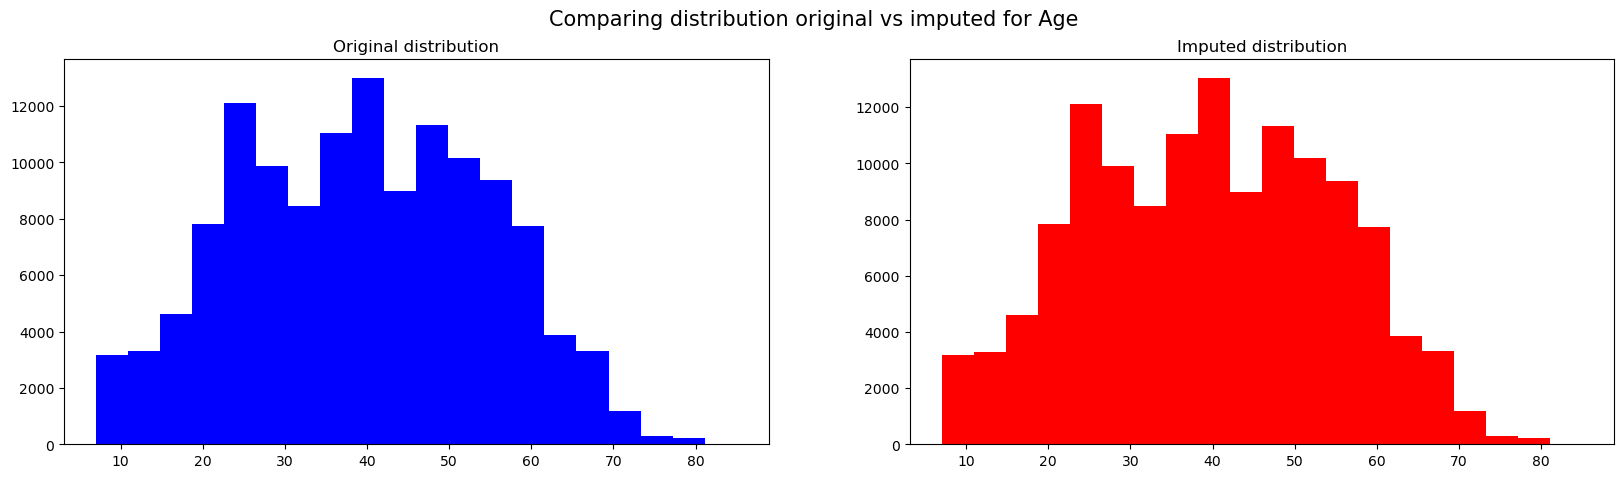

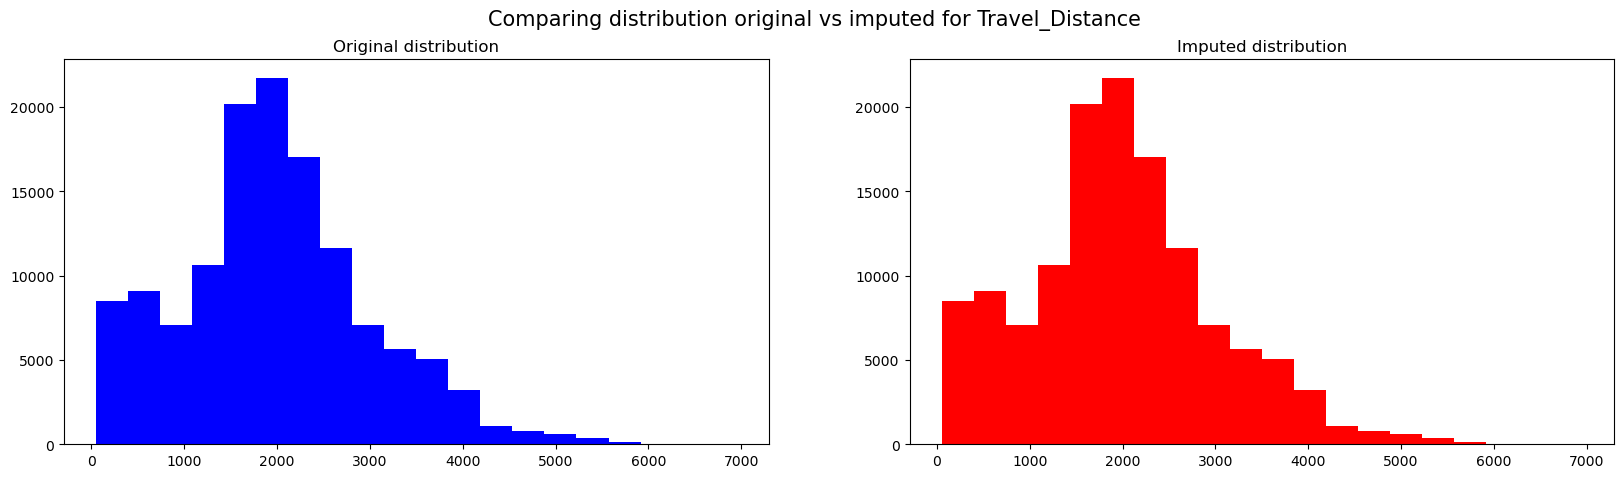

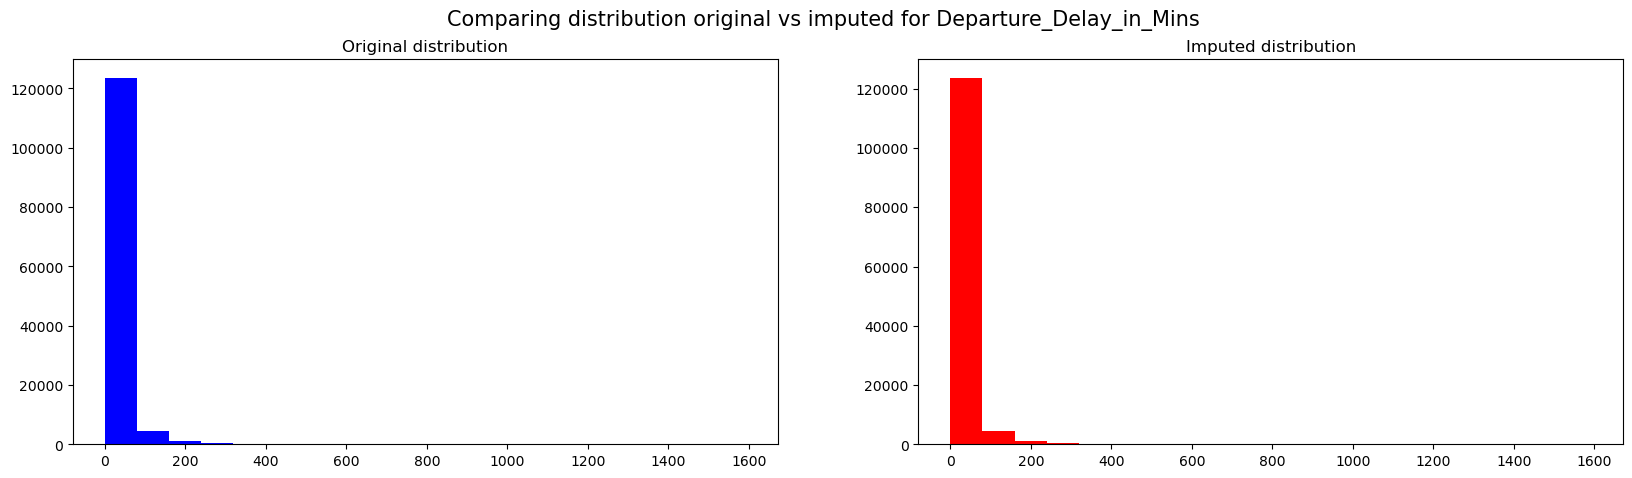

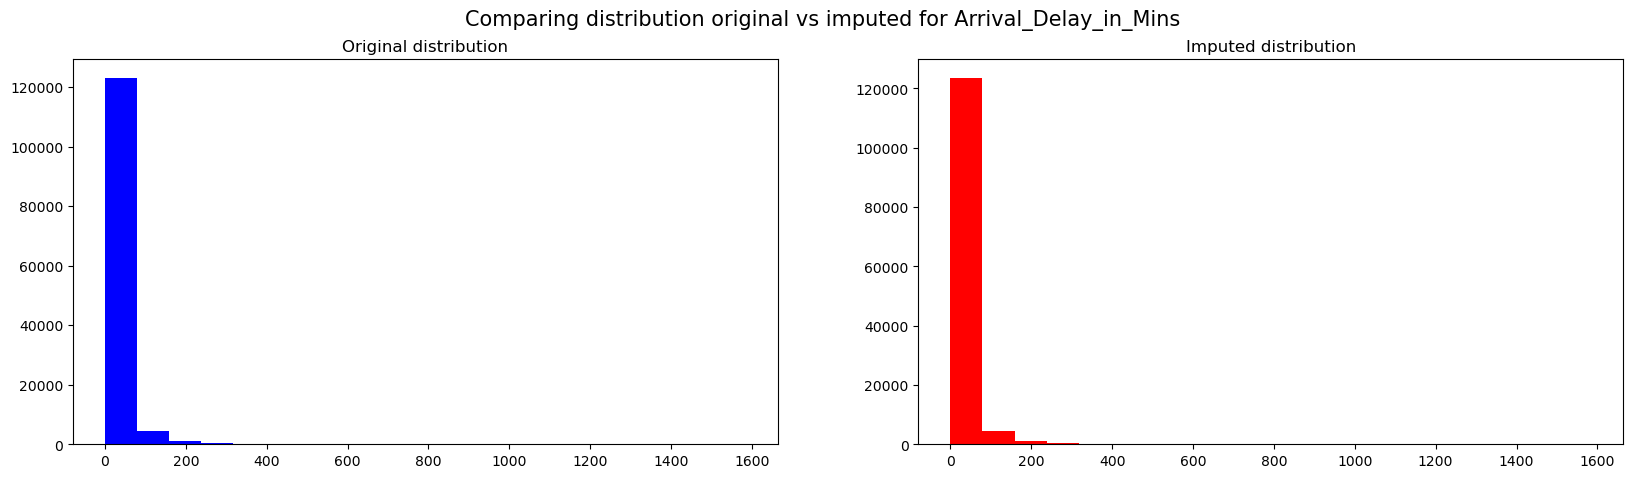

In [8]:
# Specify columns to plot
# Plot distributions for mean imputed data
plot_distributions(df, mean_imputed_data, numerical_cols, 'Mean Imputed')

## <span style="color:blue"> Categorical imputation </span>

In [9]:
def plot_categorical_distribution(original_data, imputed_data, columns, method_name):
    for col in columns:

        # Original data relative frequencies
        original_counts = original_data[col].value_counts(normalize=True)
        original_values = original_counts.index
        original_frequencies = original_counts.values

        # Imputed data relative frequencies
        imputed_counts = imputed_data[col].value_counts(normalize=True)
        imputed_values = imputed_counts.index
        imputed_frequencies = imputed_counts.values

        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        fig.suptitle(f'Comparing distribution original vs imputed for {col}')
        
        ax[0].bar(original_values, original_frequencies, color='blue', alpha=0.5, label='Original')      
        ax[0].set_title('Original distribution')
        ax[1].bar(imputed_values, imputed_frequencies, color='red', alpha=0.5, label=method_name)
        ax[1].set_title('Imputed values')
        
        plt.show()

In [10]:
def hot_deck_impute(column):

    non_missing_values = column.dropna().values
    value_counts = pd.Series(non_missing_values).value_counts(normalize=True)
    probabilities = value_counts / value_counts.sum()
    
    return column.apply(lambda x: np.random.choice(value_counts.index, p=probabilities) if pd.isna(x) else x)

In [11]:
categorical_columns = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
                    'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 
                    'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 
                    'Onboard_Entertainment', 'Online_Support', 
                    'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
                    'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
                    'Online_Boarding']

In [12]:
# Apply Hot Deck Imputation
hot_deck_imputed_data = df.copy()
for col in categorical_columns:
    hot_deck_imputed_data[col] = hot_deck_impute(hot_deck_imputed_data[col])

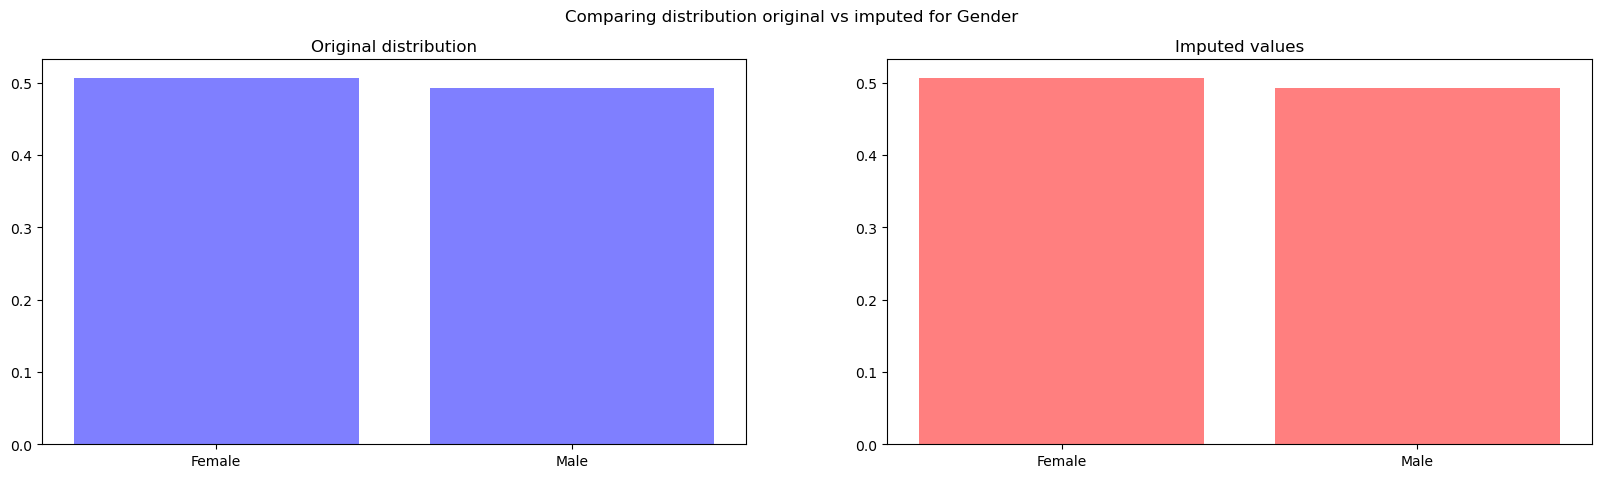

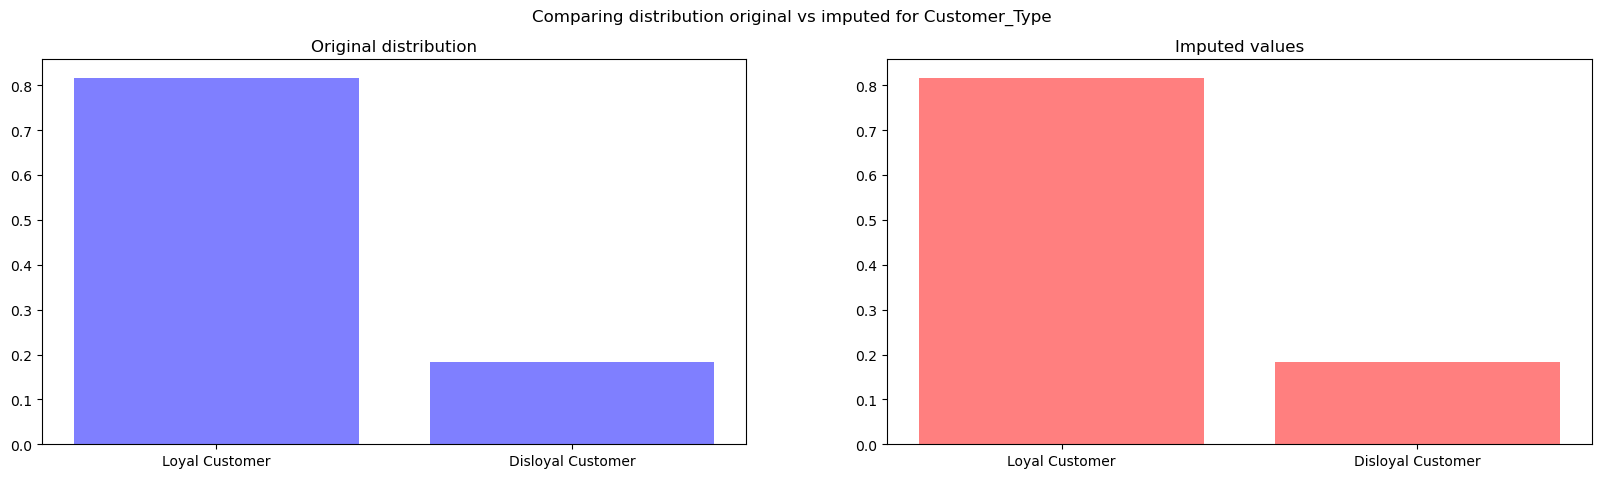

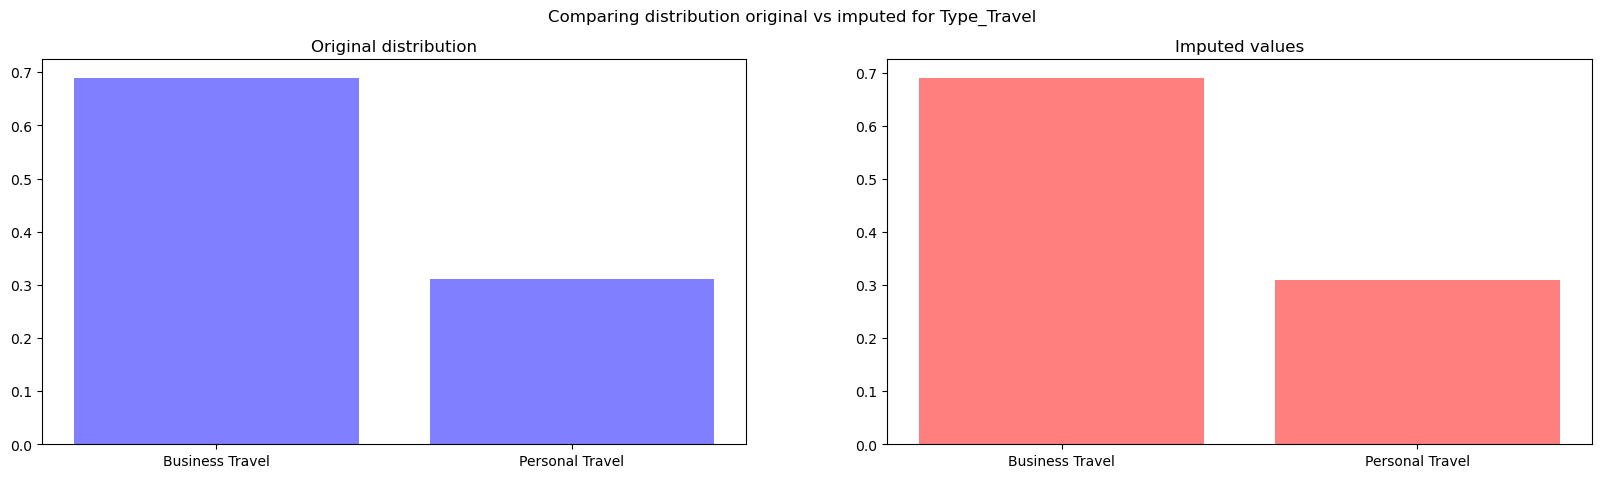

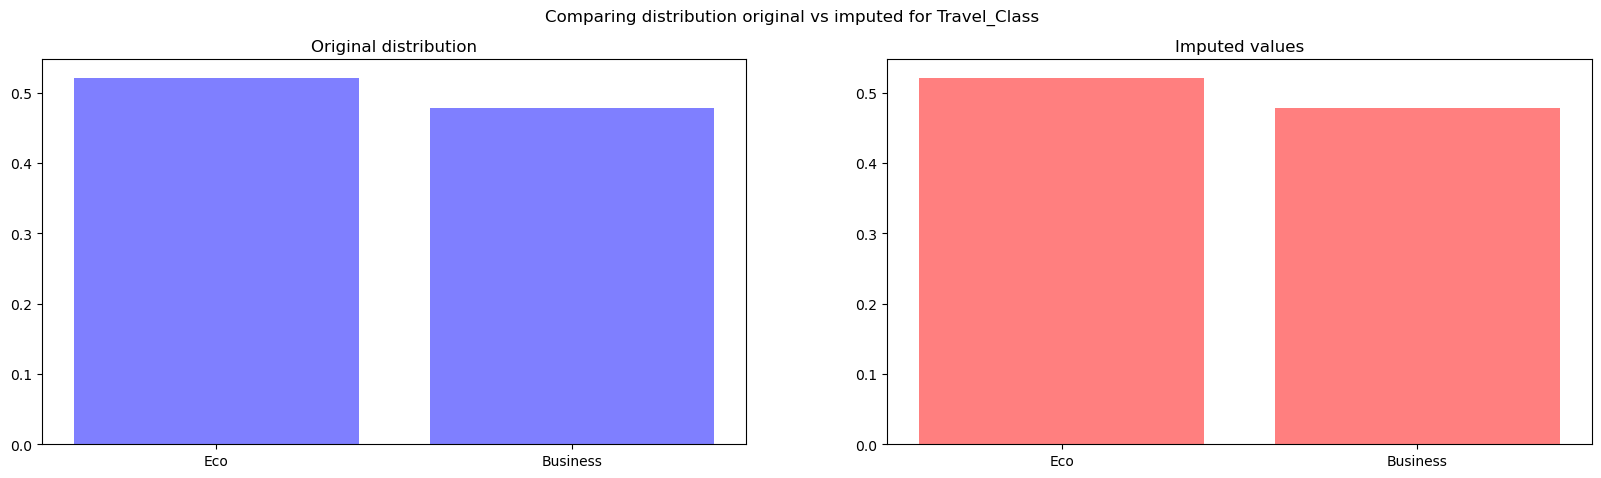

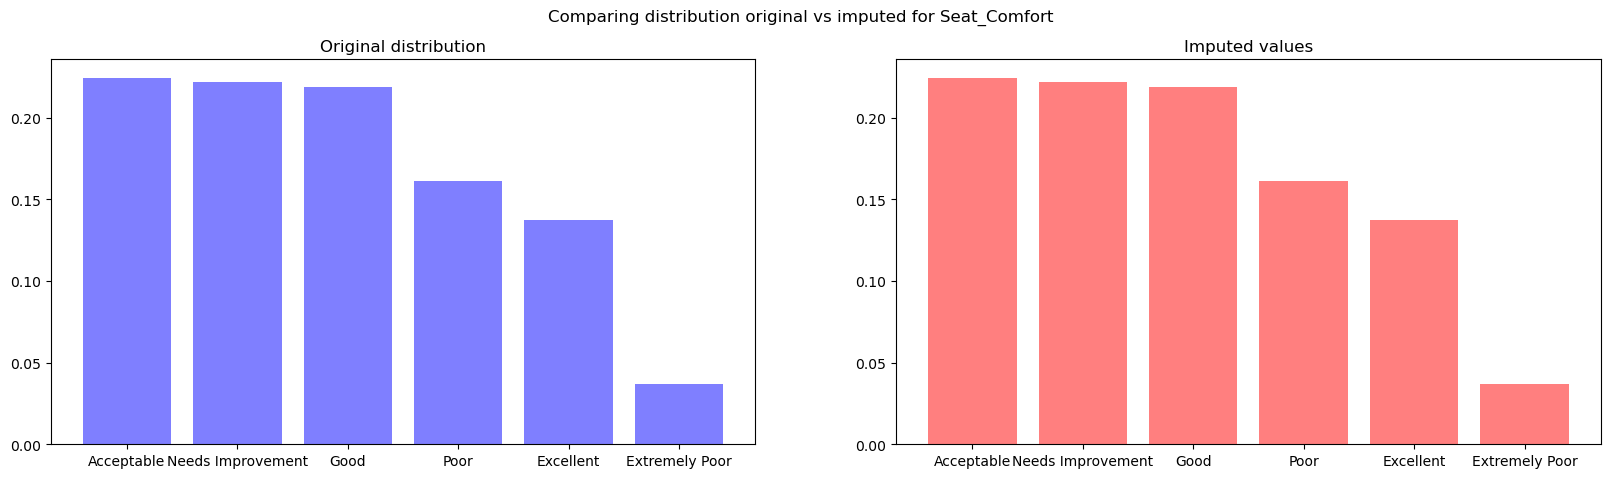

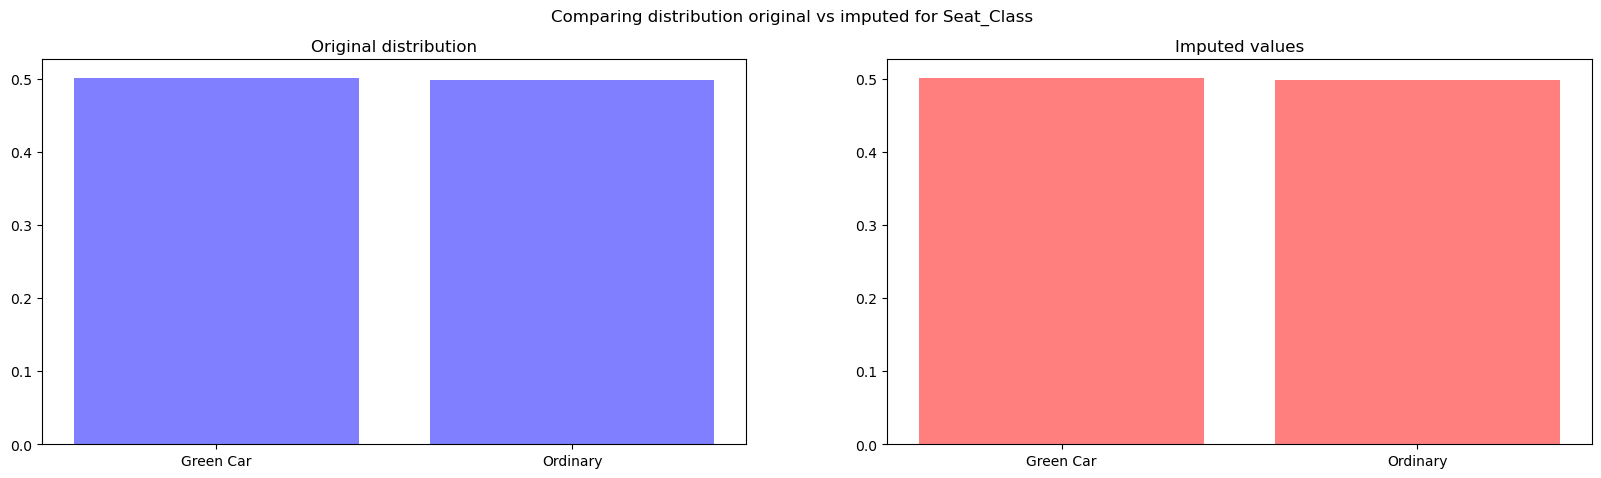

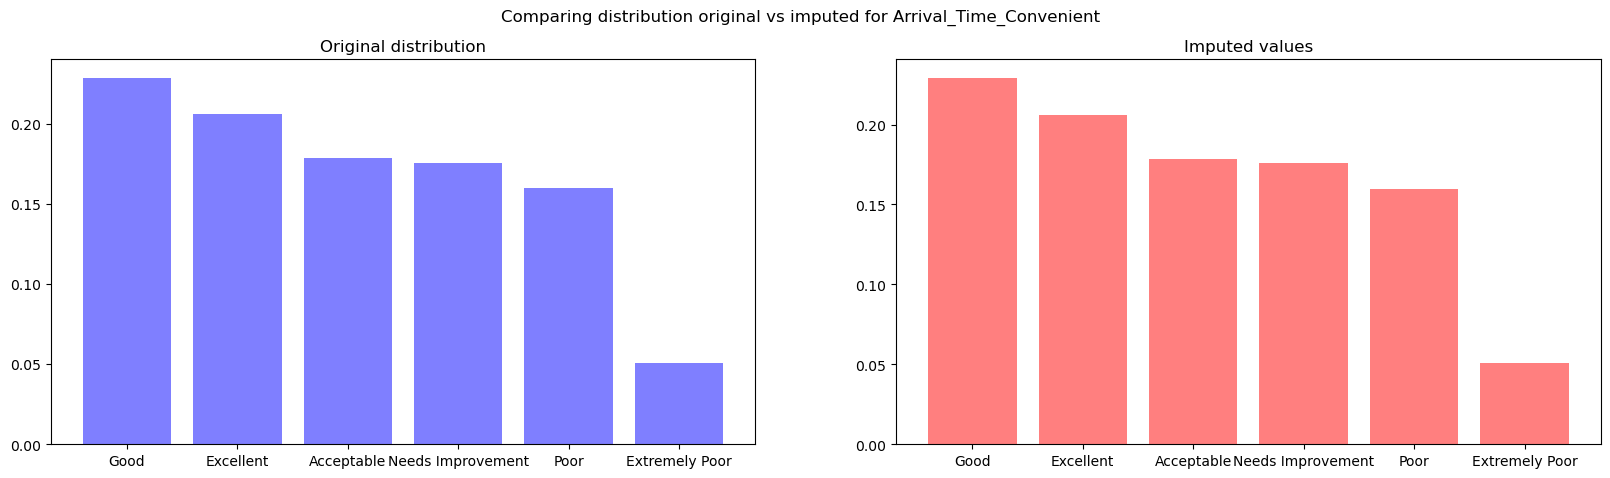

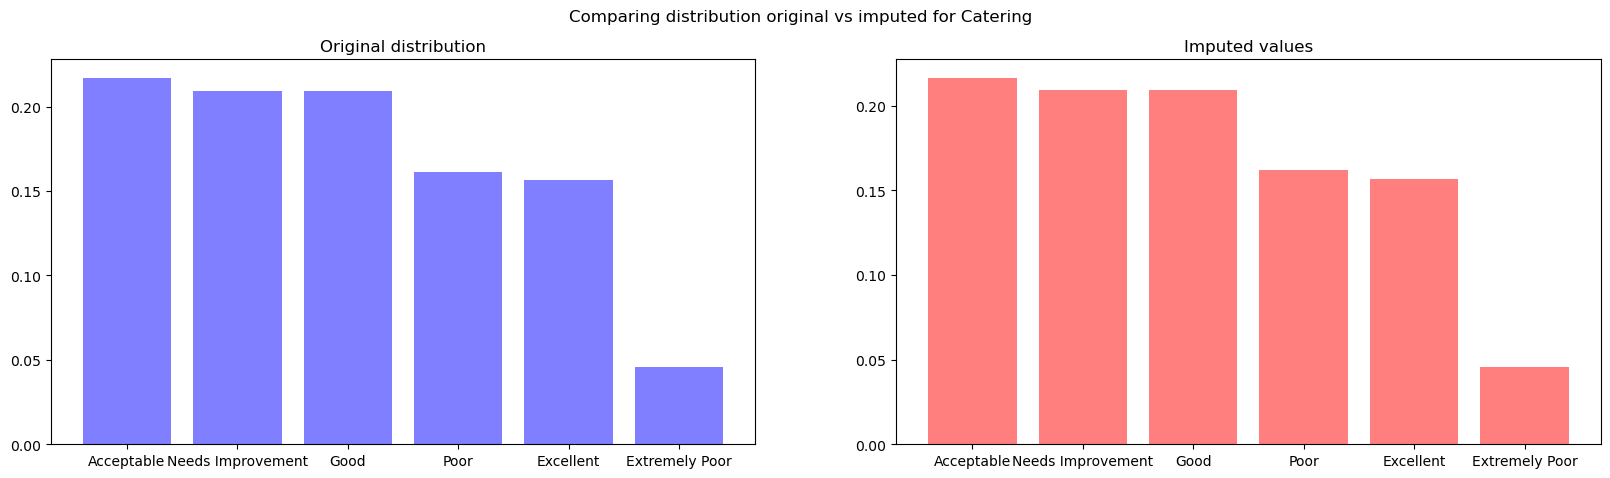

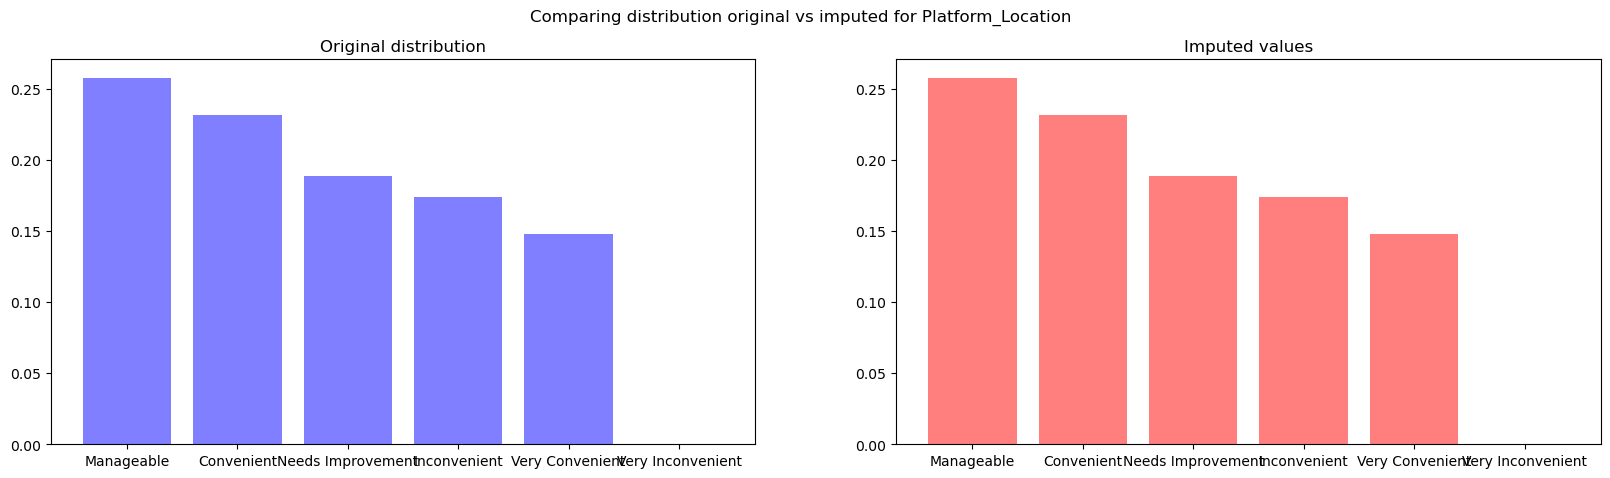

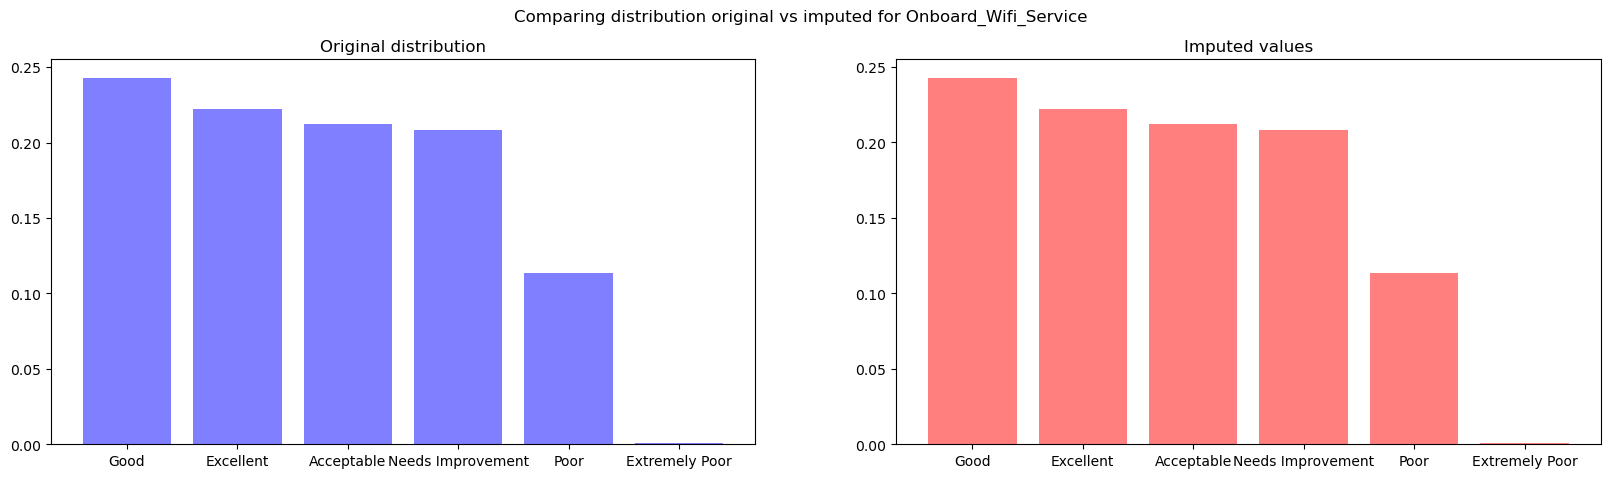

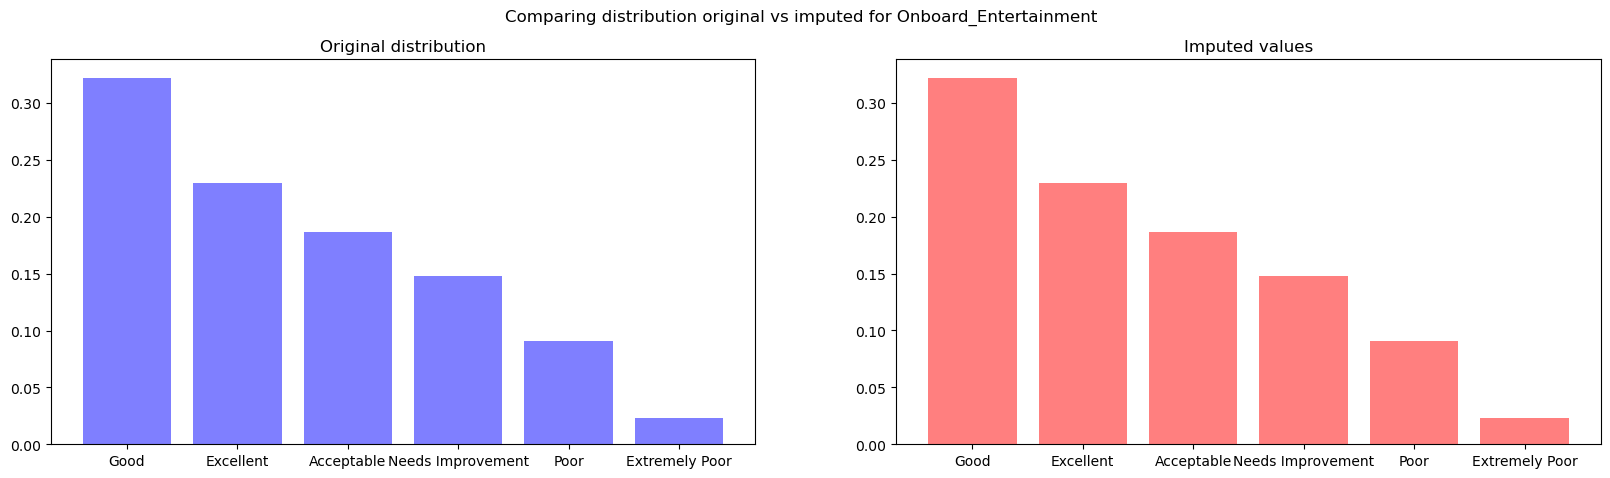

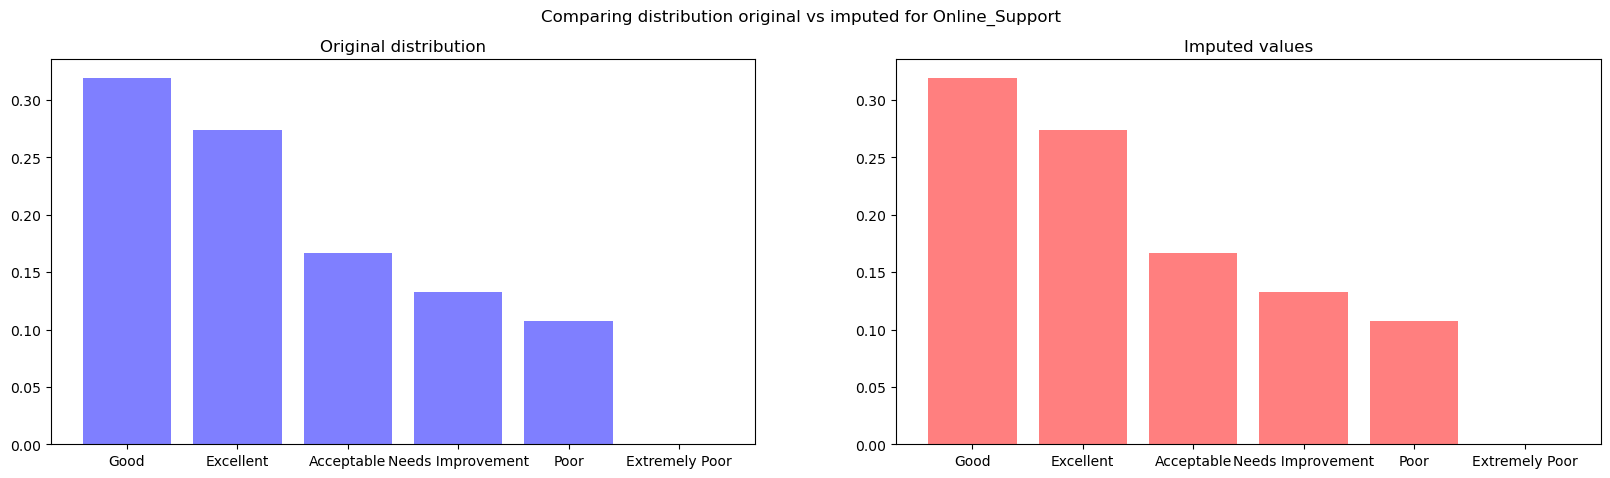

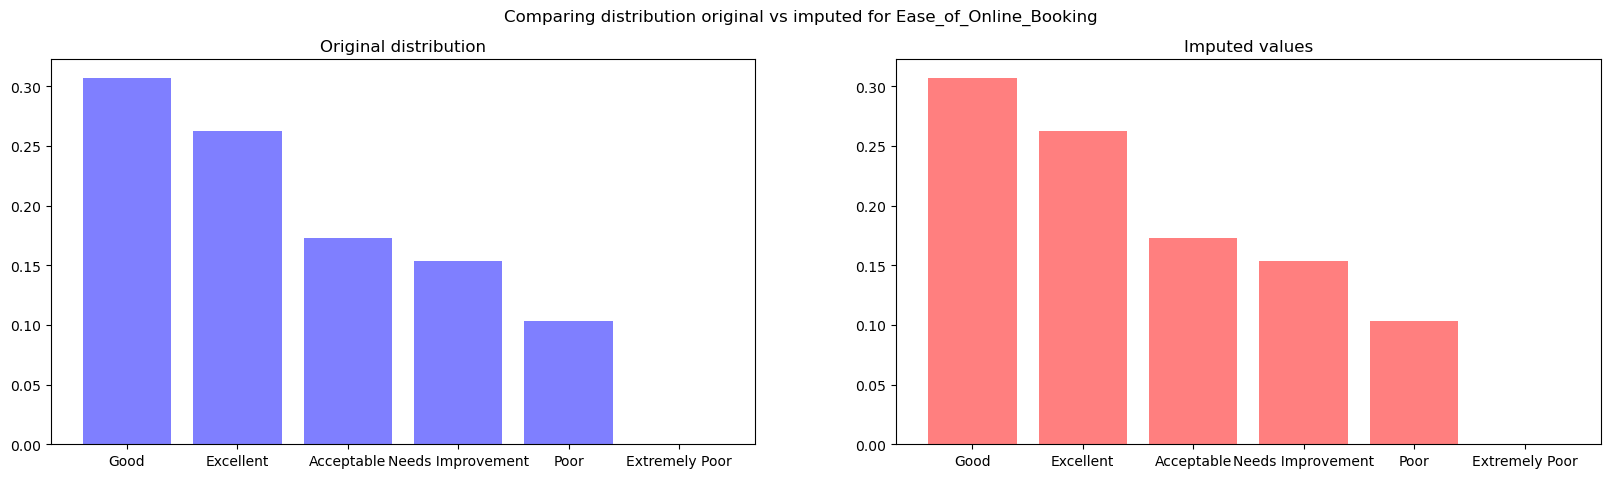

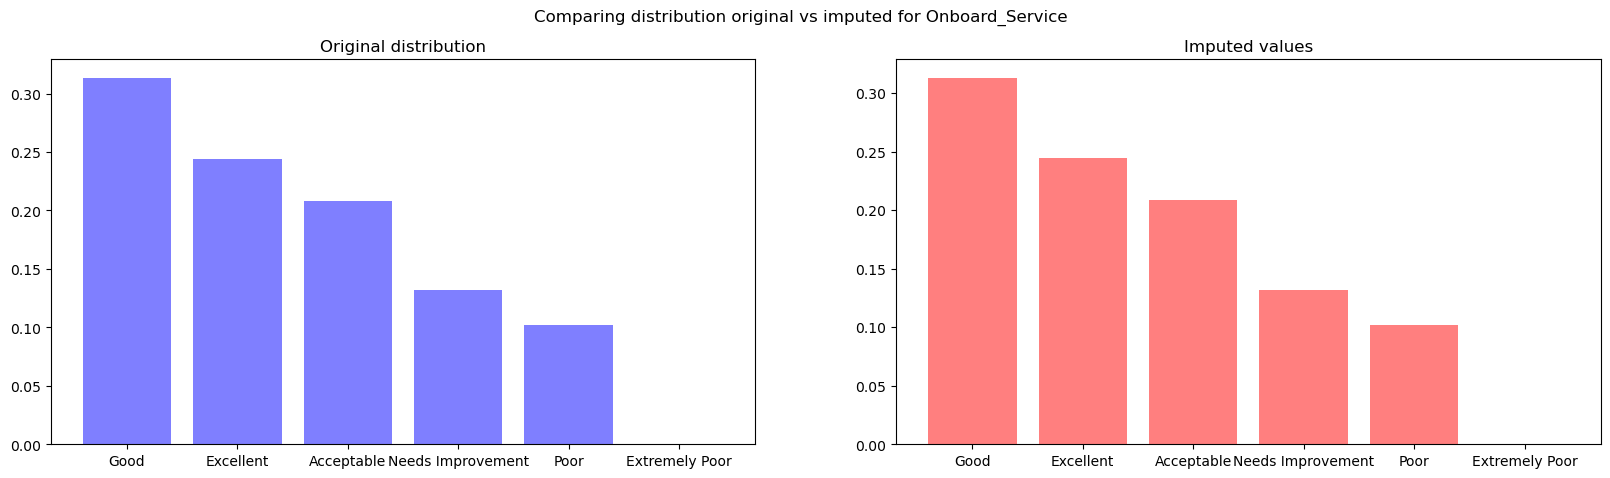

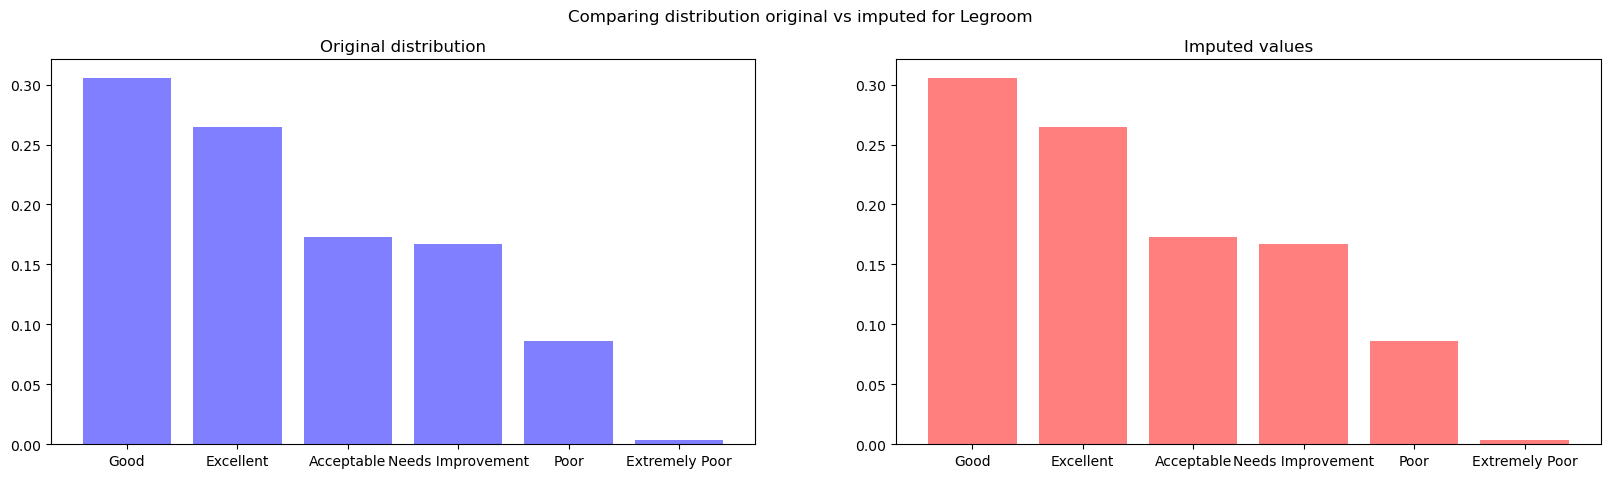

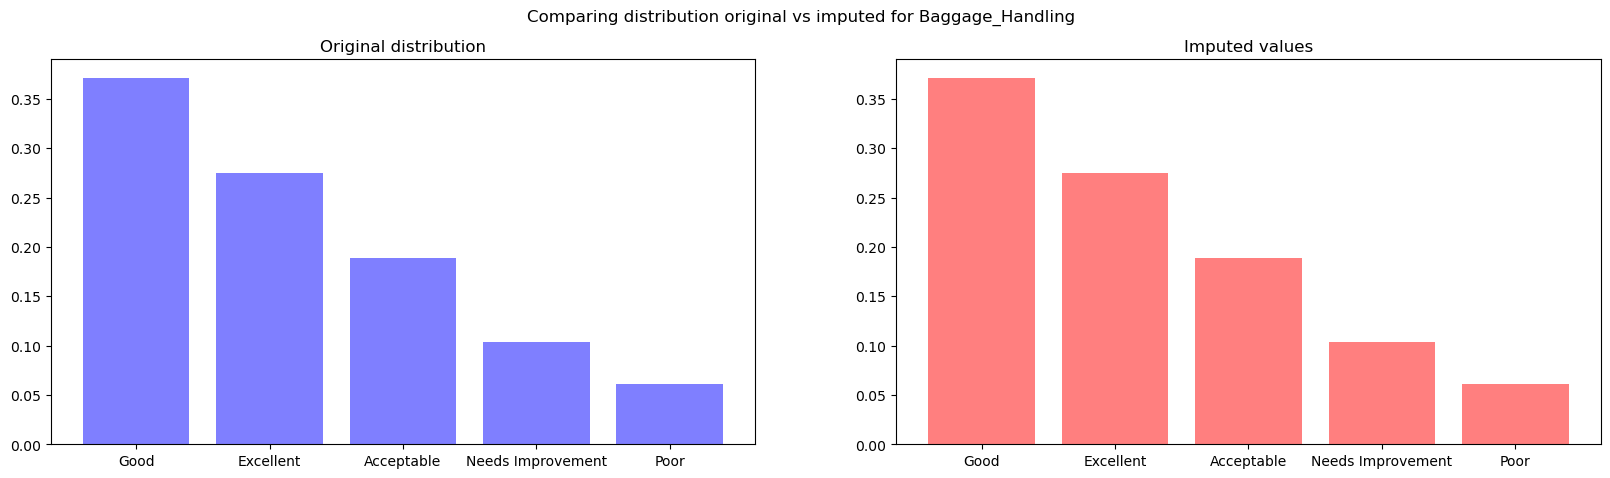

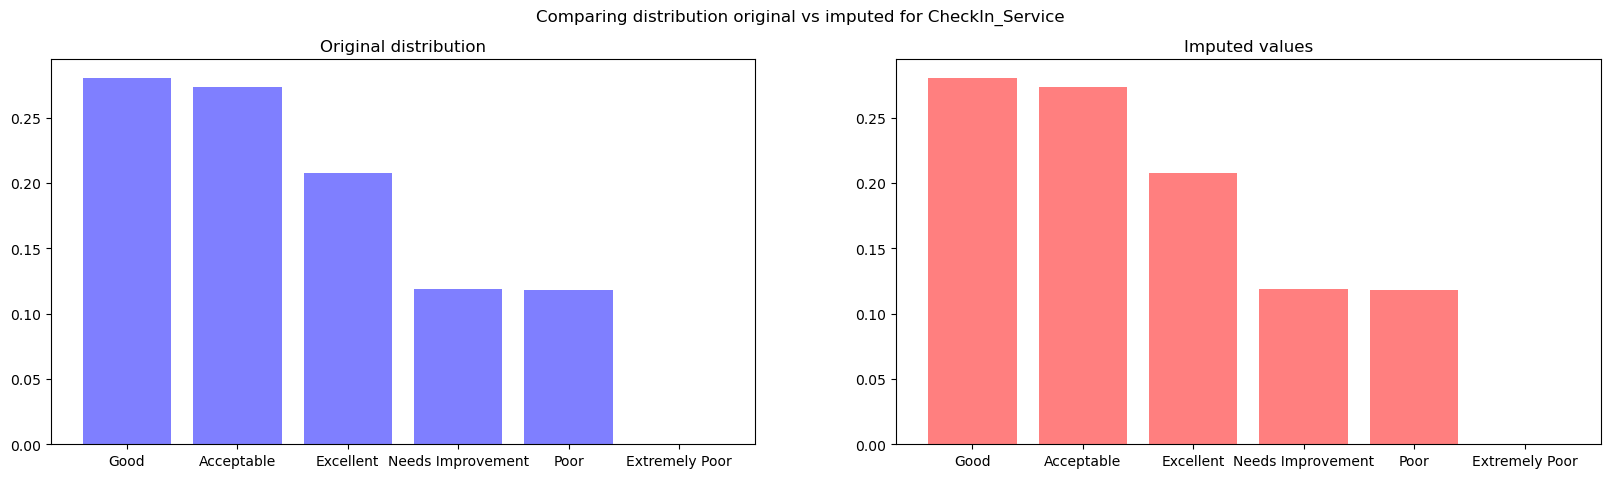

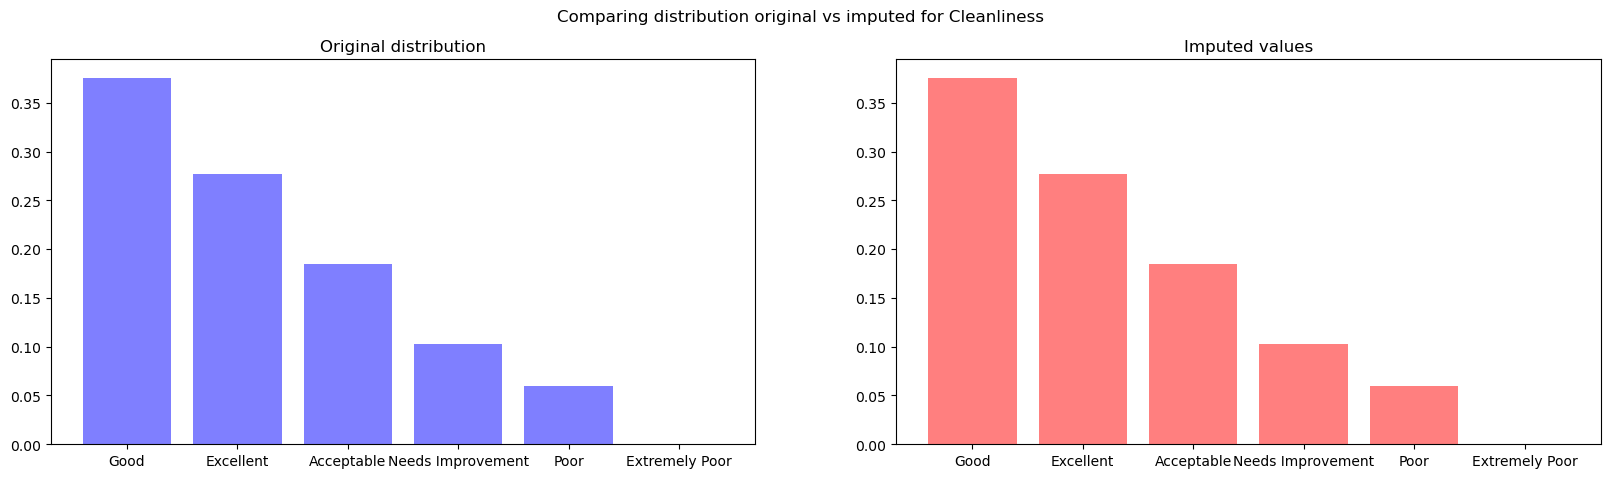

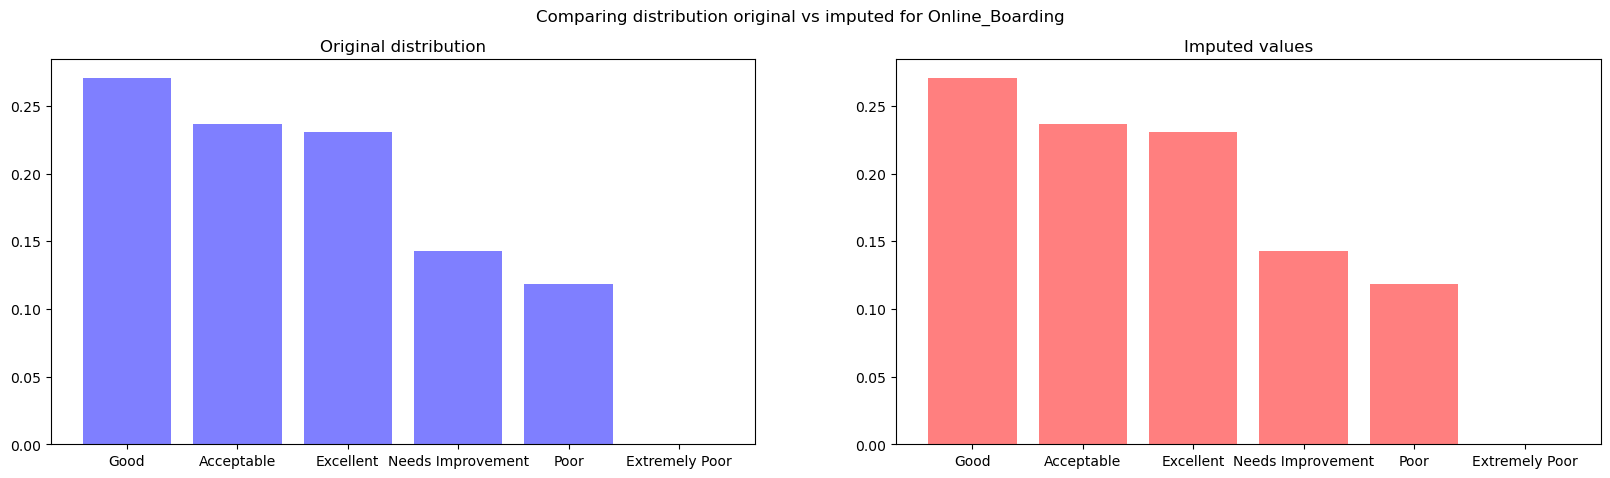

In [13]:
plot_categorical_distribution(df, hot_deck_imputed_data, categorical_columns, 'Mode Imputed')

## <span style="color:blue"> Join imputation </span>

In [14]:
numerical_columns = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [15]:
imputed_df = pd.merge(mean_imputed_data[['ID'] + numerical_columns], hot_deck_imputed_data[['ID'] + categorical_columns], on='ID')

In [16]:
imputed_df['train_test'] = df['train_test']

train_imputed_df = imputed_df[imputed_df['train_test']=='train']
test_imputed_df = imputed_df[imputed_df['train_test']=='test']

In [17]:
train_imputed_df['Overal_Experience'] = train_df['Overall_Experience']

In [18]:
train_imputed_df

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,...,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,train_test,Overal_Experience
0,98800001,52.0,272,0.0,5.0,Female,Loyal Customer,Business Travel,Business,Needs Improvement,...,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,train,0
1,98800002,48.0,2200,9.0,0.0,Male,Loyal Customer,Personal Travel,Eco,Poor,...,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,train,0
2,98800003,43.0,1061,77.0,119.0,Female,Loyal Customer,Business Travel,Business,Needs Improvement,...,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,train,1
3,98800004,44.0,780,13.0,18.0,Female,Loyal Customer,Business Travel,Business,Acceptable,...,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,train,0
4,98800005,50.0,1981,0.0,0.0,Female,Loyal Customer,Business Travel,Business,Acceptable,...,Excellent,Good,Good,Good,Good,Good,Good,Good,train,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,32.0,1357,83.0,125.0,Male,Loyal Customer,Business Travel,Business,Poor,...,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor,train,0
94375,98894376,44.0,592,5.0,11.0,Male,Loyal Customer,Business Travel,Business,Good,...,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good,train,1
94376,98894377,63.0,2794,0.0,0.0,Male,Disloyal Customer,Business Travel,Business,Needs Improvement,...,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable,train,1
94377,98894378,16.0,2744,0.0,0.0,Male,Loyal Customer,Personal Travel,Eco,Needs Improvement,...,Good,Good,Acceptable,Good,Good,Good,Excellent,Good,train,0


In [19]:
test_imputed_df

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,train_test
94379,99900001,36.0,532,0.0,0.0,Female,Loyal Customer,Business Travel,Business,Acceptable,...,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor,test
94380,99900002,21.0,1425,9.0,28.0,Female,Disloyal Customer,Business Travel,Business,Extremely Poor,...,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable,test
94381,99900003,60.0,2832,0.0,0.0,Male,Loyal Customer,Business Travel,Business,Excellent,...,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent,test
94382,99900004,29.0,1352,0.0,0.0,Female,Loyal Customer,Personal Travel,Eco,Acceptable,...,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor,test
94383,99900005,18.0,1610,17.0,0.0,Male,Disloyal Customer,Business Travel,Business,Excellent,...,Excellent,Excellent,Excellent,Acceptable,Acceptable,Excellent,Excellent,Excellent,Excellent,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129976,99935598,8.0,1334,0.0,0.0,Male,Loyal Customer,Personal Travel,Eco,Needs Improvement,...,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable,test
129977,99935599,53.0,1772,0.0,0.0,Female,Loyal Customer,Business Travel,Business,Needs Improvement,...,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good,test
129978,99935600,22.0,1180,0.0,0.0,Male,Disloyal Customer,Business Travel,Eco,Good,...,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement,test
129979,99935601,67.0,420,23.0,16.0,Female,Loyal Customer,Personal Travel,Eco,Excellent,...,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good,test


In [20]:
train_imputed_df.drop('train_test', axis=1, inplace=True)
test_imputed_df.drop('train_test', axis=1, inplace=True)

In [21]:
train_imputed_df.to_csv('../../input/train/imputed/train_imputed_df_hot_deck.csv', sep=';', index=False)
test_imputed_df.to_csv('../../input/test/imputed/test_imputed_df_hot_deck.csv', sep = ';', index=False)